In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
import gdown
file_id = "1EtAaBcR88yr4Ir870TmIoeJK-BkQn5Wc"
output = "df_inegi_coneval_limpio.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1EtAaBcR88yr4Ir870TmIoeJK-BkQn5Wc
To: /content/df_inegi_coneval_limpio.csv
100%|██████████| 3.04M/3.04M [00:00<00:00, 43.9MB/s]


In [ ]:
df_final = df.select_dtypes(include=[np.number])

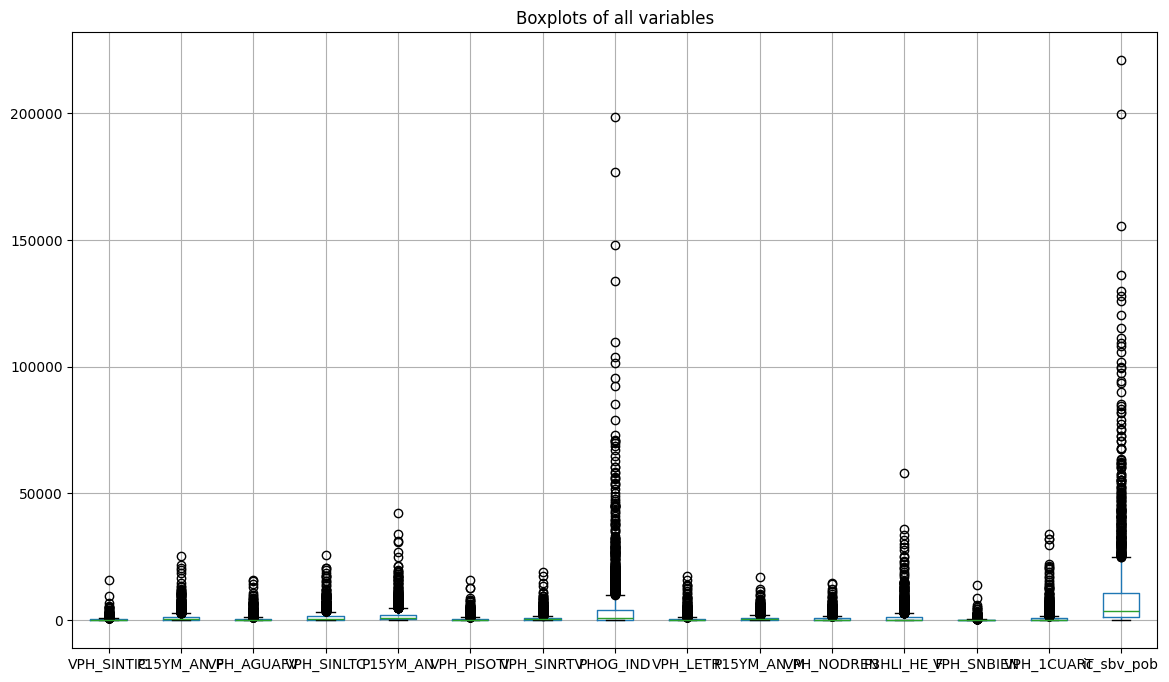

In [ ]:
import matplotlib.pyplot as plt
selected_features = [
    "VPH_SINTIC",
    "P15YM_AN_F",
    "VPH_AGUAFV",
    "VPH_SINLTC",
    "P15YM_AN",
    "VPH_PISOTI",
    "VPH_SINRTV",
    "PHOG_IND",
    "VPH_LETR",
    "P15YM_AN_M",
    "VPH_NODREN",
    "P3HLI_HE_F",
    "VPH_SNBIEN",
    "VPH_1CUART",
    'ic_sbv_pob'
]

df_final[selected_features].boxplot(figsize=(14, 8))
plt.title("Boxplots of all variables")
plt.show()

# verificando supuestos para aplicar transformacón logarítmica

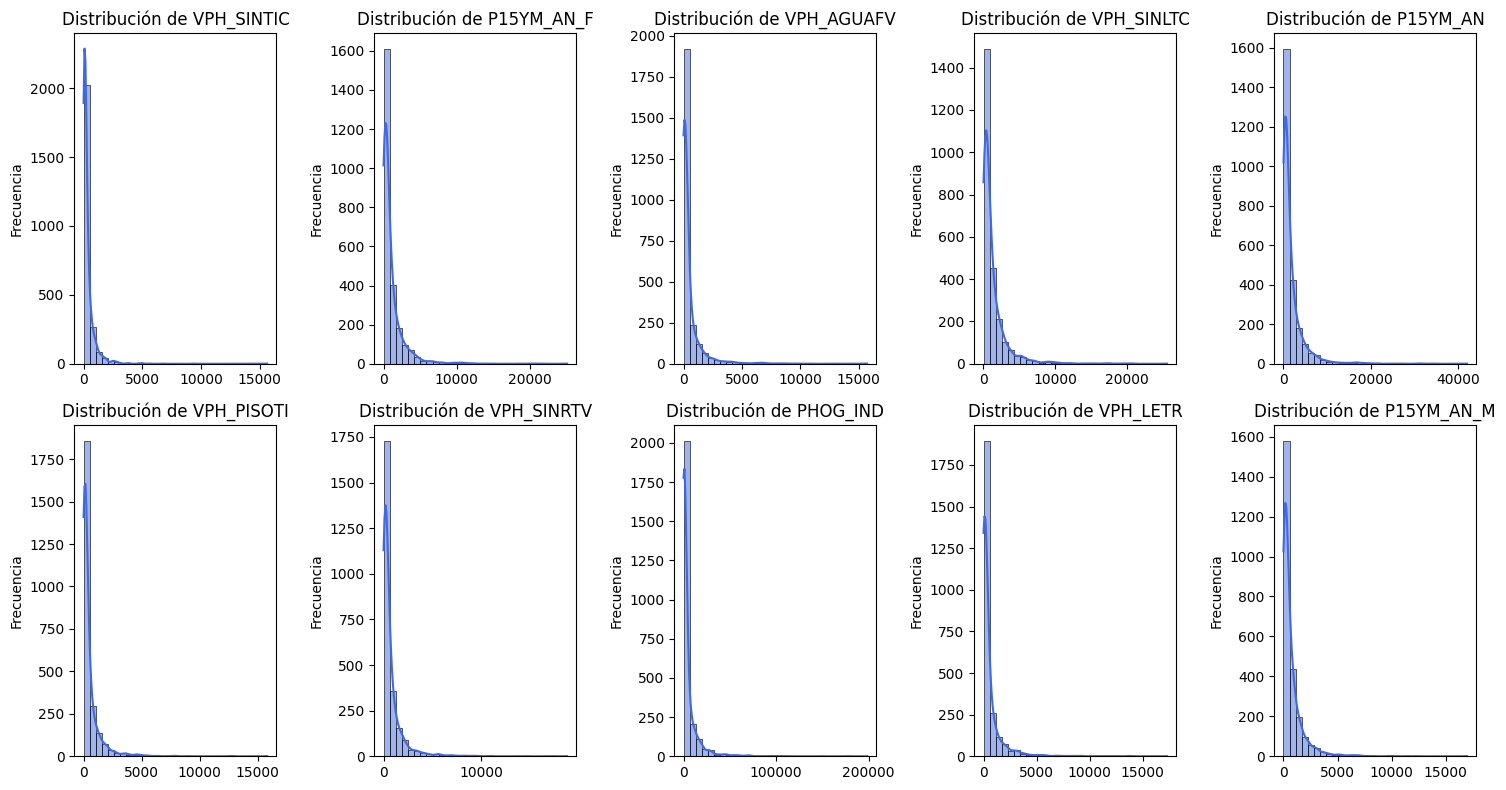

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for var, ax in zip(selected_features, axes.flatten()):
    sns.histplot(df_final[var], bins=30, kde=True, color="royalblue", edgecolor="black", ax=ax)
    ax.set_title(f"Distribución de {var}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


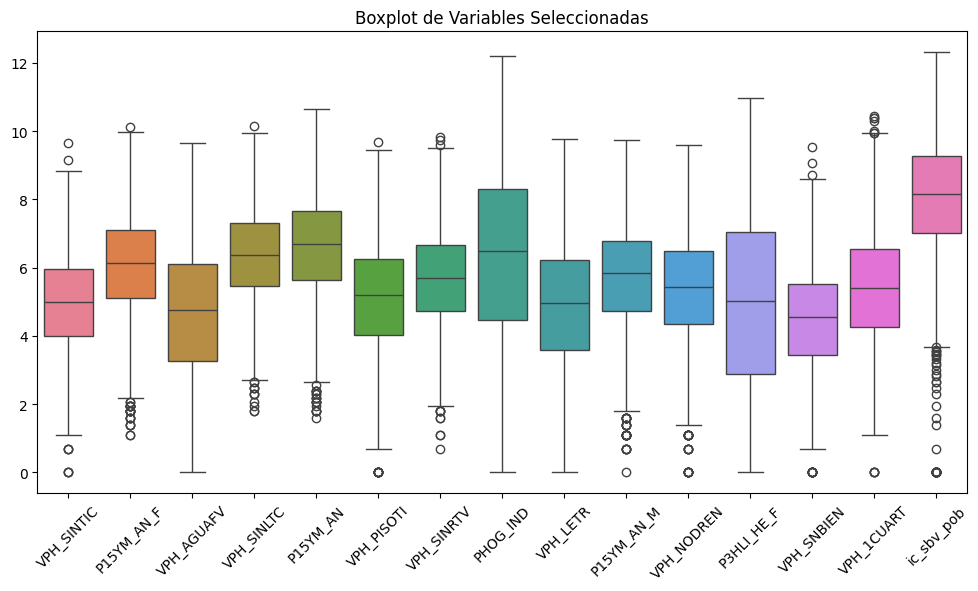

In [ ]:
df_log = df_final.copy()
for col in selected_features:
    df_log[col] = np.log1p(df_log[col])

plt.figure(figsize=(12, 6))

sns.boxplot(data=df_log[selected_features])

plt.xticks(rotation=45)

plt.title("Boxplot de Variables Seleccionadas")
plt.show()

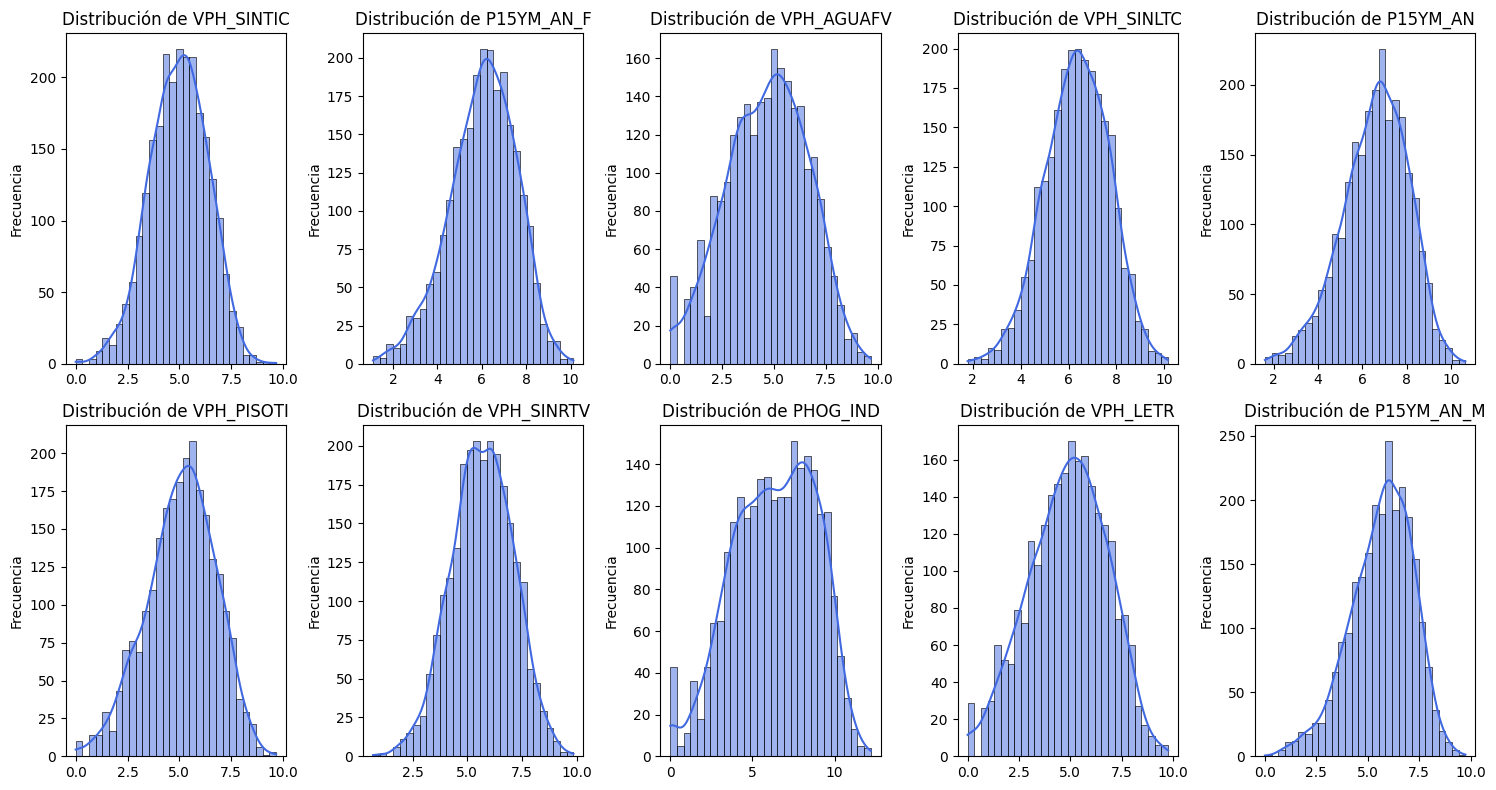

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for var, ax in zip(selected_features, axes.flatten()):
    sns.histplot(df_log[var], bins=30, kde=True, color="royalblue", edgecolor="black", ax=ax)
    ax.set_title(f"Distribución de {var}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalizado = pd.DataFrame(scaler.fit_transform(df_log), columns=df_log.columns)

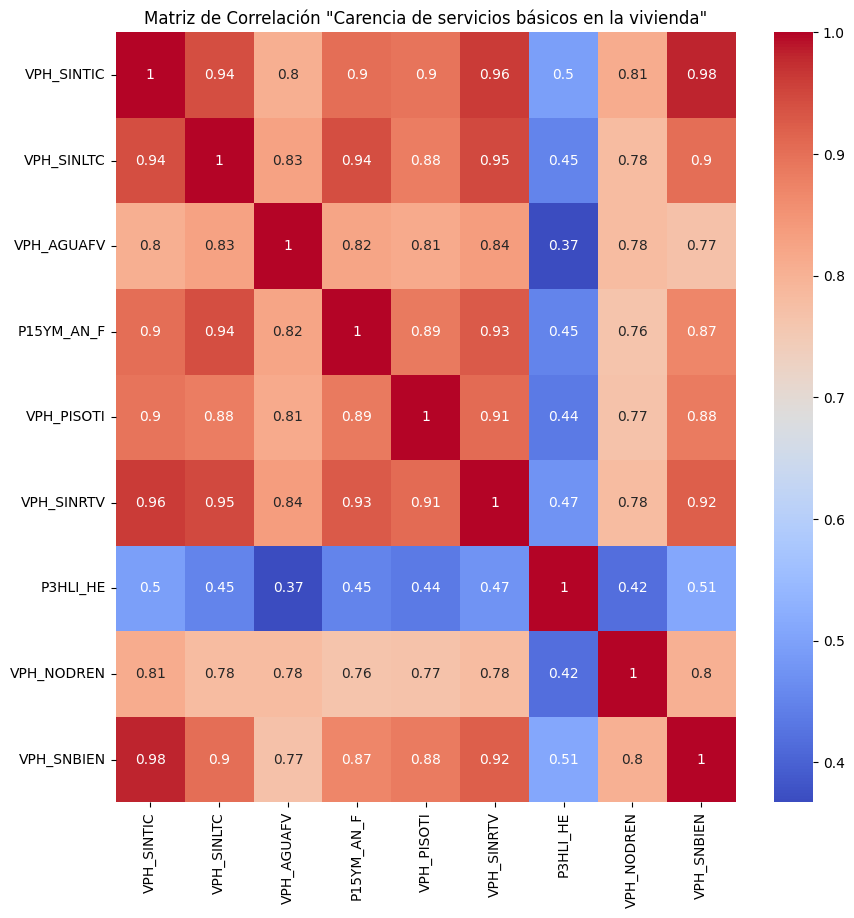

In [ ]:

plt.figure(figsize=(10, 10))
sns.heatmap(df_normalizado[features].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación "Carencia de servicios básicos en la vivienda"')
plt.show()

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error


target = "ic_sbv_pob"
features = [
    "VPH_SINTIC",
    "P15YM_AN_F",
    "VPH_AGUAFV",
    "VPH_SINLTC",
    "P15YM_AN",
    "VPH_PISOTI",
    "VPH_SINRTV",
    "PHOG_IND",
    "VPH_LETR",
    "P15YM_AN_M",
    "VPH_NODREN",
    "P3HLI_HE_F",
    "VPH_SNBIEN",
    "VPH_1CUART"
]

X = df_normalizado[features]
y = df_normalizado[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "AdaBoost": AdaBoostRegressor(estimator= DecisionTreeRegressor(max_depth=6), n_estimators=50, learning_rate=0.5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, objective="reg:squarederror"),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

results = []

for name, model in models.items():
    X_train_final, X_test_final = X_train, X_test

    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"Model": name, "R²": r2, "MSE": mse})


In [ ]:
df_results = pd.DataFrame(results)
df_results

,Model,R²,MSE
0,Linear Regression,0.718413,0.005958
1,Ridge,0.715878,0.006012
2,Bayesian Ridge,0.717379,0.005980
3,Decision Tree,0.559007,0.009331
4,Random Forest,0.708356,0.006171
5,Gradient Boosting,0.696173,0.006429
6,SVR,0.667942,0.007026
7,AdaBoost,0.698200,0.006386
8,XGBoost,0.696149,0.006429
9,Neural Network,0.679906,0.006773


#### Guardar DataFrame final

In [ ]:
from google.colab import files

columns = features + [target]
df_normalizado[columns].to_csv('dataset.csv', index=False)
files.download('dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>